In [68]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [69]:
# set display options
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 500)

In [70]:
# read in the data
train = pd.read_csv("./datasets/train.csv")
test = pd.read_csv("./datasets/test.csv")

In [71]:
# create a copy of the original data
train_copy = train.copy()

In [72]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
# check the shape of the dataframe
train.shape, test.shape

((1460, 81), (1459, 80))

#### Join both train and test for easier analysis and transformation

In [74]:
# Split the feature from the train set before merging
y = train["SalePrice"].reset_index(drop=True)
train_features = train.drop("SalePrice", axis=1)

# Join both train and test for easier analysis and transformation
train_merged = pd.concat([train_features, test]).reset_index(drop=True)

In [75]:
train_merged.shape

(2919, 80)

#### Perform some data cleaning

In [76]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
Id               2919 non-null int64
MSSubClass       2919 non-null int64
MSZoning         2915 non-null object
LotFrontage      2433 non-null float64
LotArea          2919 non-null int64
Street           2919 non-null object
Alley            198 non-null object
LotShape         2919 non-null object
LandContour      2919 non-null object
Utilities        2917 non-null object
LotConfig        2919 non-null object
LandSlope        2919 non-null object
Neighborhood     2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
BldgType         2919 non-null object
HouseStyle       2919 non-null object
OverallQual      2919 non-null int64
OverallCond      2919 non-null int64
YearBuilt        2919 non-null int64
YearRemodAdd     2919 non-null int64
RoofStyle        2919 non-null object
RoofMatl         2919 non-null object
Exterior1st      2918 non-

#### Observations:
* There's a couple of columns with null values. Investigate and fill them appropriately

#### Investigate null columns

In [77]:
def computeNulls(df):
    null_df = df.isnull().sum().sort_values(ascending=False)
    column_total = df.shape[0]
    
    null_totals = null_df[null_df != 0]
    percentage = null_df[null_df != 0] / column_total * 100
    
    return pd.concat([null_totals, percentage], axis=1, keys=["Totals", "Percentage"])
    
null_df = computeNulls(train_merged)
null_df

,Totals,Percentage
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageCond,159,5.447071
GarageQual,159,5.447071
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


#### Observations:
* There seem to be some columns that are completely empty. Research on why that is before working to fill them

* Columns to be filled with **None**:
    * ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType", ]
    
    
* Columns to be filled with **0**:
    * ["LotFrontage", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageArea", "GarageCars"]
    
    
* Columns to be filled with **median**:
    * ["GarageYrBlt"]
    
    
* Columns to be filled with **most frequent**:
    * ["MSZoning", "Utilities", "Functional", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]

In [78]:
# Columns to be filled with None
none_cols = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond", "GarageQual", "GarageFinish", "GarageType", "BsmtCond", "BsmtExposure", "BsmtQual", "BsmtFinType2", "BsmtFinType1", "MasVnrType"]

# Columns to be filled with 0
zero_cols = ["LotFrontage", "MasVnrArea", "BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "GarageArea", "GarageCars"]

# Columns to be filled with median
median_cols = ["GarageYrBlt"]

# Columns to be filled with most frequent value
mostfreq_cols = ["MSZoning", "Utilities", "Functional", "Electrical", "KitchenQual", "Exterior1st", "Exterior2nd", "SaleType"]

In [79]:
from sklearn.impute import SimpleImputer

In [80]:
none_imputer = SimpleImputer(strategy="constant", fill_value="Not Available")
zero_imputer = SimpleImputer(strategy="constant", fill_value=0)
median_imputer = SimpleImputer(strategy="median")
mostfreq_imputer = SimpleImputer(strategy="most_frequent")

for col in none_cols:
    train_merged[col] = none_imputer.fit_transform(train_merged[col].values.reshape(-1,1))

for col in zero_cols:
    train_merged[col] = zero_imputer.fit_transform(train_merged[col].values.reshape(-1,1))
    
for col in median_cols:
    train_merged[col] = median_imputer.fit_transform(train_merged[col].values.reshape(-1,1))

for col in mostfreq_cols:
    train_merged[col] = mostfreq_imputer.fit_transform(train_merged[col].values.reshape(-1,1))

In [81]:
# Get some summary statistics of the data
train_merged.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1460.000000,57.137718,57.766701,10168.114080,6.089072,5.564577,1971.312778,1984.264474,101.396026,441.272011,49.565262,560.579993,1051.417266,1159.581706,336.483727,4.694416,1500.759849,0.429599,0.061322,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.161699,1.766016,472.712573,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737
std,842.787043,42.517628,33.481636,7886.996359,1.409947,1.113131,30.291442,20.894344,178.854579,455.606014,169.179104,439.590889,441.120498,392.362079,428.701456,46.396825,506.051045,0.524676,0.245608,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,24.868576,0.762196,215.535686,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,730.500000,20.000000,43.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.500000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1460.000000,50.000000,63.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.000000,0.000000,467.000000,989.000000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2189.500000,70.000000,78.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,163.500000,733.000000,0.000000,805.000000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [82]:
# Check for duplicates in the data
train_merged[train_merged.duplicated(keep="first")]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [83]:
train_merged.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Not Available,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal


### Data Exploration (EDA)

In [84]:
# Check the distribution of the data
# fig, ax = plt.subplots(figsize=(20, 20))
# train_merged.hist(ax=ax)

#### Drop the Id column since its not impactful in the analysis. Remember to keep the test IDs for submission

In [85]:
# Get test IDs
testIDs = train_merged.iloc[len(y):,:1]

# Drop the IDs column in the merged data
train_merged.drop("Id", axis=1, inplace=True)

In [86]:
testIDs.shape

(1459, 1)

In [87]:
# Check for outliers in the data
numeric_cols = train_merged.select_dtypes(exclude="object").columns

for col in numeric_cols:
    fig = plt.figure()
    sns.boxplot(y=col, data=train_merged)
    plt.close(fig)

#### Observations:
* Heavily skewed to the right
    * LoftFrontage, LoftArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, TotalBsmtSF, 1stFlrSF, LowQualFinSF, GrLivArea, BedroomAbvGr, KitchenAbvGr, Fireplaces, 3SSnPorch, ScreenPorch, PoolArea, MiscVal, 

#### Check how the features correlate

In [88]:
train_merged.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.229823,-0.201730,0.033638,-0.065625,0.034409,0.043315,0.006309,-0.064002,-0.072431,-0.125561,-0.219008,-0.248641,0.309309,0.026482,0.071677,0.010436,-0.001728,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,0.083676,-0.046794,-0.103534,-0.017654,-0.015923,-0.020867,-0.037529,-0.049181,-0.003080,-0.028867,-0.001231,-0.015028
LotFrontage,-0.229823,1.000000,0.135246,0.132635,-0.036252,0.027906,0.070162,0.108969,0.069193,-0.004681,0.136565,0.205762,0.242302,-0.004662,0.019003,0.185659,0.021255,-0.032766,0.081663,-0.029819,0.108014,0.021445,0.197209,0.054045,0.033939,0.142732,0.186527,0.000537,0.085640,0.023613,0.003704,0.044891,0.109480,0.002787,0.018746,-0.014728
LotArea,-0.201730,0.135246,1.000000,0.100541,-0.035617,0.024128,0.021612,0.124728,0.194168,0.084107,0.021590,0.254316,0.332460,0.031515,0.000554,0.284519,0.126671,0.025838,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,-0.009165,0.180379,0.213180,0.158045,0.104797,0.020974,0.015995,0.054375,0.093708,0.069029,0.004156,-0.024234
OverallQual,0.033638,0.132635,0.100541,1.000000,-0.093847,0.597554,0.571532,0.426528,0.282150,-0.042605,0.275643,0.549763,0.479152,0.245596,-0.048393,0.575126,0.165060,-0.040519,0.528483,0.272668,0.073075,-0.159325,0.389761,0.390753,0.542218,0.600743,0.565179,0.255317,0.298084,-0.139256,0.018715,0.042910,0.030740,0.005562,0.030405,-0.019614
OverallCond,-0.065625,-0.036252,-0.035617,-0.093847,1.000000,-0.368477,0.047654,-0.133118,-0.050823,0.041359,-0.138687,-0.174837,-0.157418,0.005494,0.009048,-0.116569,-0.042823,0.083911,-0.215504,-0.088577,-0.008477,-0.086700,-0.092027,-0.030999,-0.305035,-0.181926,-0.154312,0.020123,-0.068978,0.071044,0.043739,0.043713,-0.016876,0.033956,-0.006256,0.030102
YearBuilt,0.034409,0.027906,0.024128,0.597554,-0.368477,1.000000,0.612235,0.307520,0.279780,-0.027507,0.130786,0.408750,0.310814,0.017588,-0.144191,0.242666,0.211849,-0.030171,0.471169,0.269743,-0.053101,-0.137614,0.114280,0.170680,0.788253,0.538611,0.481328,0.229426,0.198554,-0.374073,0.015958,-0.041046,0.002304,-0.010886,0.013938,-0.012344
YearRemodAdd,0.043315,0.070162,0.021612,0.571532,0.047654,0.612235,1.000000,0.191668,0.152576,-0.061959,0.165770,0.299019,0.242245,0.158985,-0.060371,0.316972,0.135150,-0.046167,0.457980,0.211430,-0.021912,-0.142431,0.198250,0.134157,0.626341,0.425033,0.375892,0.218513,0.242182,-0.220456,0.037433,-0.046878,-0.011407,-0.003124,0.017693,0.033203
MasVnrArea,0.006309,0.108969,0.124728,0.426528,-0.133118,0.307520,0.191668,1.000000,0.301537,-0.014580,0.088173,0.393715,0.392367,0.119377,-0.057380,0.400088,0.141141,0.016204,0.254085,0.187685,0.078213,-0.051118,0.277103,0.273129,0.240459,0.357845,0.371071,0.166606,0.140880,-0.110614,0.014059,0.066392,0.004791,0.045156,-0.002216,-0.017654
BsmtFinSF1,-0.064002,0.069193,0.194168,0.282150,-0.050823,0.279780,0.152576,0.301537,1.000000,-0.054938,-0.476771,0.536650,0.458206,-0.161997,-0.065984,0.211980,0.639038,0.078500,0.081838,-0.007058,-0.113161,-0.086271,0.052629,0.293305,0.189373,0.255307,0.310219,0.223681,0.124366,-0.099575,0.050934,0.096901,0.084470,0.093310,-0.000671,0.022500
BsmtFinSF2,-0.072431,-0.004681,0.084107,-0.042605,0.041359,-0.027507,-0.061959,-0.014580,-0.054938,1.000000,-0.238043,0.089561,0.084389,-0.097654,-0.004913,-0.017747,0.162957,0.099530,-0.075314,-0.032368,-0.031111,-0.037758,-0.048245,0.065707,-0.068393,-0.014476,0.003446,0.098462,-0.005805,0.032775,-0.023268,0.063329,0.044530,-0.005130,-0.009510,0.008867


In [89]:
sns.heatmap?

In [90]:
# Plot a heatmap to visualize the feature correlations
# fig = plt.figure(figsize=(18,14))
# mask = np.triu(np.ones_like(train_merged.corr(), dtype=np.bool))
# sns.heatmap(data=train_merged.corr(), mask=mask, linewidths=0.08, annot=True, fmt=".2f")

In [91]:
# Check how the values correlate to the target
new_df = train_merged.iloc[:len(y), :].join(y)
new_df_corr = new_df.corr()["SalePrice"].sort_values(ascending=False).drop("SalePrice")

In [92]:
new_df_corr.shape

(36,)

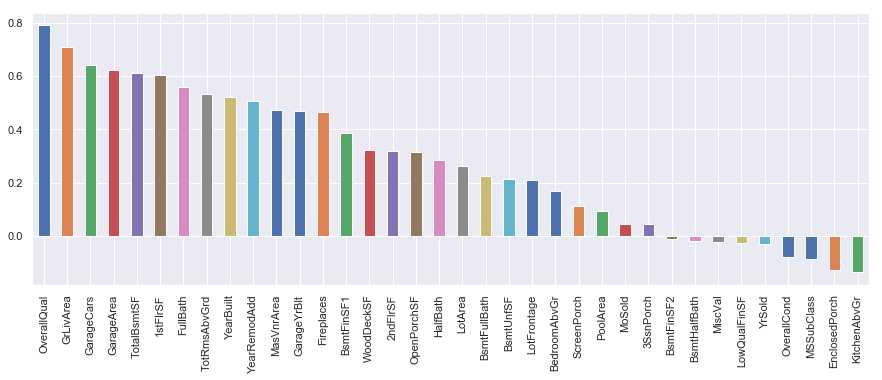

In [109]:
# Plot a bar graph of the correlation
fig, ax = plt.subplots(figsize=(15, 5))
new_df_corr.plot(kind="bar", ax=ax)

In [94]:
new_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Not Available,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal,250000


#### Check how categorical features affect the SalePrice

In [95]:
categorical_cols = new_df.select_dtypes(include="object").columns

In [96]:
new_df["Street"].unique()

array(['Pave', 'Grvl'], dtype=object)

In [97]:
new_df.groupby(col)["SalePrice"].agg("median")

YrSold
2006    163995
2007    167000
2008    164000
2009    162000
2010    155000
Name: SalePrice, dtype: int64

In [99]:
# Categorical Features must be in numeric form first
# fig, axes = plt.subplots(14, 3, figsize=(18, 80))
# axes = axes.flatten()

# for col, ax in zip(categorical_cols, axes):
#     data = new_df.groupby(by=col)["SalePrice"].agg("median")
#     sns.boxplot(x=col, y="SalePrice", ax=ax, data=data)
    
#     plt.tight_layout()

#### Observations:
* Houses in Residential Zones have a higher sale price


In [100]:
train_merged.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
2372,60,FV,0.0,8010,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2003,2004,Hip,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Ex,TA,No,GLQ,964.0,Unf,0.0,90.0,1054.0,GasA,Ex,Y,SBrkr,1072,976,0,2048,1.0,0.0,2,1,3,1,Gd,8,Typ,2,Gd,Detchd,2003.0,Unf,2.0,552.0,TA,TA,Y,0,48,0,0,180,0,Not Available,Not Available,Not Available,0,8,2007,WD,Normal
878,85,RL,88.0,11782,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,5,7,1961,1995,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,ALQ,899.0,Unf,0.0,210.0,1109.0,GasA,TA,Y,SBrkr,1155,0,0,1155,1.0,0.0,1,0,3,1,Gd,6,Min2,0,Not Available,Detchd,1987.0,Unf,2.0,576.0,TA,TA,Y,192,0,0,0,0,0,Not Available,MnPrv,Shed,400,6,2010,WD,Normal
2399,50,RL,51.0,3500,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,3,5,1945,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,144.0,Unf,0.0,226.0,370.0,GasA,TA,N,FuseA,442,228,0,670,1.0,0.0,1,0,2,1,Fa,4,Typ,0,Not Available,Not Available,1979.0,Not Available,0.0,0.0,Not Available,Not Available,N,0,21,0,0,0,0,Not Available,MnPrv,Shed,2000,7,2007,WD,Normal
2288,20,RL,110.0,14333,Pave,Not Available,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1518.0,Unf,0.0,590.0,2108.0,GasA,Ex,Y,SBrkr,2122,0,0,2122,1.0,0.0,2,1,2,1,Gd,7,Typ,1,Ex,Attchd,2007.0,Fin,3.0,938.0,TA,TA,Y,130,142,0,0,0,0,Not Available,Not Available,Not Available,0,11,2007,New,Partial
261,60,RL,69.0,9588,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,CemntBd,CmentBd,Stone,270.0,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1482.0,1482.0,GasA,Ex,Y,SBrkr,1482,1092,0,2574,0.0,0.0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2007.0,Fin,3.0,868.0,TA,TA,Y,0,148,0,0,0,0,Not Available,Not Available,Not Available,0,11,2007,New,Partial


In [101]:
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [102]:
new_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Not Available,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Not Available,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Not Available,Not Available,Not Available,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Not Available,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Not Available,Not Available,Not Available,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Not Available,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Not Available,Not Available,Not Available,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Not Available,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Not Available,Not Available,Not Available,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Not Available,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Not Available,Not Available,Not Available,0,12,2008,WD,Normal,250000


#### Check for monthly seasonality in the price of the houses

In [103]:
# fig, ax = plt.subplots(figsize=(12, 6))
# new_df.groupby("MoSold")["SalePrice"].agg("mean").plot(kind="bar",  y="SalePrice", x="MoSold", ax=ax)

#### Observation:
* There's no major seasonality trend in the prices of houses

### Feature Engineering

#### Drop columns that dont seem necessary when looking for a house

In [104]:
# Determine columns : Some basic Feature Selection. This can be dropped after further investigation
features_to_keep = ["MSSubClass", "LotArea", "Utilities", "Neighborhood", "BldgType", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "GarageCars", "GarageArea", "PoolArea", "YrSold", "GarageCars"]
features_to_investigate = ["LotFrontage", "LotArea", "Street", "Alley", "LandContour", "LandSlope", "GarageCars", "GarageArea", "Condition1", "Condition2"]
all_features = features_to_investigate + features_to_keep

In [105]:
print(all_features)

['LotFrontage', 'LotArea', 'Street', 'Alley', 'LandContour', 'LandSlope', 'GarageCars', 'GarageArea', 'Condition1', 'Condition2', 'MSSubClass', 'LotArea', 'Utilities', 'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'GarageCars', 'GarageArea', 'PoolArea', 'YrSold']


In [125]:
train_merged_select.shape

(2919, 40)

In [107]:
train_merged_select = train_merged[all_features]

#### Compute the age of the house when it was sold

In [111]:
train_merged_select["Age"] = train_merged_select["YrSold"] - train_merged_select["YearBuilt"]

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [113]:
train_merged_select["Time_since_last_remodel"] =  train_merged_select["YrSold"] -  train_merged_select["YearRemodAdd"]

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [140]:
train_merged_select.shape

(2919, 27)

In [134]:
# Drop Year and YearRemodAdd, BsmtFin1 and BsmtFin2,  1stFlrSF , 2ndFlrSF
# GarageCars, GarageArea, 1stFlr, 2ndflrsf, fullbath, yearbuilt, yearremoddadd, bsmtfinsf1 an 2, halfbaths, lot area,
train_merged_select = train_merged_select.drop(["GarageCars", "GarageArea", "1stFlr", "2ndFlrSF", 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', "YearBuilt", "Time_since_last_remodel", 'BsmtFinSF1', 'BsmtFinSF2', "LotArea"], axis=1)

In [136]:
train_merged_select["GarageCars"] = train_merged["GarageCars"]
train_merged_select["LotArea"] = train_merged["LotArea"]

In [139]:
train_merged_select.drop("SalePrice", axis=1, inplace=True)

In [114]:
train_merged_select["Total_BsmtFinSF"] =  train_merged_select["BsmtFinSF1"] +  train_merged_select["BsmtFinSF2"]

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
train_merged_select["Total_Bathrooms"] =  train_merged_select["BsmtFullBath"] + (0.5 * train_merged_select["BsmtHalfBath"]) +  train_merged_select["FullBath"] + (0.5 *  train_merged_select["HalfBath"])

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
train_merged_select["Has_Pool"] = train_merged_select["PoolArea"].apply(lambda x: 1 if x > 0 else 0)

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
# Check to see if the above grade living area is a total of the 1st and 2nd floor square footage and filter observations that dont conform to this
train_merged_select[ train_merged_select["1stFlrSF"] + train_merged_select["2ndFlrSF"] != train_merged_select["GrLivArea"]]["GrLivArea"].count()

40

In [121]:
train_merged_select["Close_to_RailRoad"] = train_merged_select.apply(lambda x: 1 if (x["Condition1"] == "RRNn" or x["Condition1"] == "RRAn" or x["Condition1"] == "RRNe" or x["Condition1"] == "RRAe") or (x["Condition2"] == "RRNn" or x["Condition2"] == "RRAn" or x["Condition2"] == "RRNe" or x["Condition2"] == "RRAe") else 0, axis=1)

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [127]:
# Merge train_merged_select and SalePrice for analysis
train_merged_select["SalePrice"] = y

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


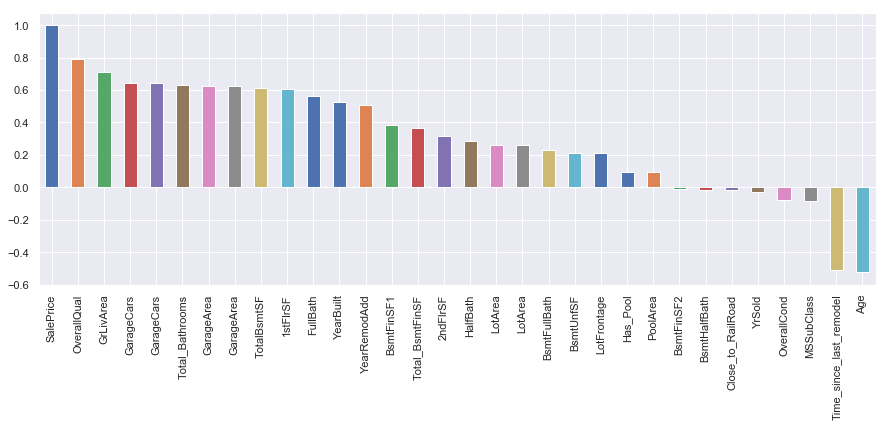

In [130]:
fig, ax = plt.subplots(figsize=(15, 5))
train_merged_select.corr()["SalePrice"].sort_values(ascending=False).plot(kind="bar", ax=ax)

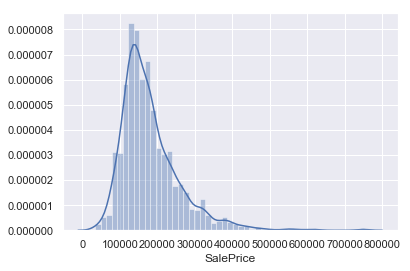

In [206]:
sns.distplot(y)

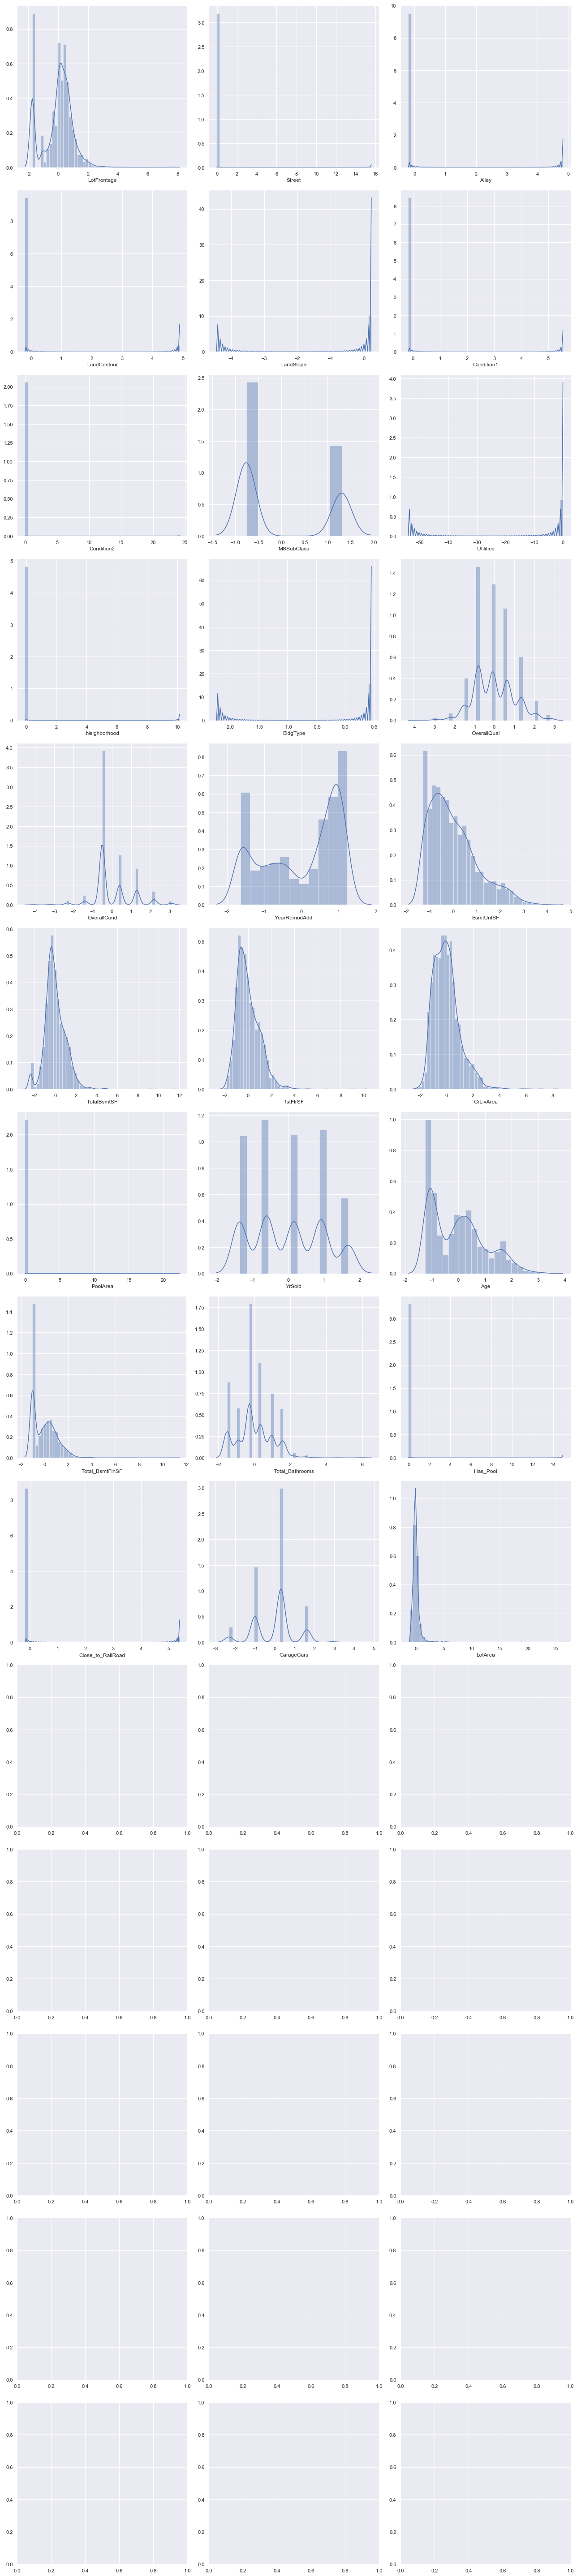

In [212]:
fig, axes = plt.subplots(14, 3, figsize=(18, 80))
axes = axes.flatten()

for col,ax in zip(train_merged.columns, axes):
    sns.distplot(train_merged[col], ax=ax)
    plt.tight_layout()

In [141]:
train_merged = train_merged_select

In [144]:
train_merged.columns

Index(['LotFrontage', 'Street', 'Alley', 'LandContour', 'LandSlope',
       'Condition1', 'Condition2', 'MSSubClass', 'Utilities', 'Neighborhood',
       'BldgType', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'PoolArea', 'YrSold', 'Age',
       'Total_BsmtFinSF', 'Total_Bathrooms', 'Has_Pool', 'Close_to_RailRoad',
       'GarageCars', 'LotArea'],
      dtype='object')

In [145]:
categorical_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [146]:
new_cat_cols = []
for col1 in train_merged.columns:
    for col2 in categorical_cols:
        if col1 == col2:
            new_cat_cols.append(col1)

new_cat_cols

['Street',
 'Alley',
 'LandContour',
 'LandSlope',
 'Condition1',
 'Condition2',
 'Utilities',
 'Neighborhood',
 'BldgType']

#### Encode categorical features

In [147]:
from sklearn.preprocessing import OneHotEncoder
import time

onehot_enc = OneHotEncoder(sparse=False)

# Encode categorical features in object dtype
for col in new_cat_cols:
    train_merged[col] = onehot_enc.fit_transform(train_merged[col].values.reshape(-1,1))
    
    

# Encode categorical features in numeric dtype (float or int)
numeric_cat_cols = ["MSSubClass"]

train_merged["MSSubClass"] = onehot_enc.fit_transform(train_merged["MSSubClass"].values.reshape(-1,1))
    

#### Feature: Floor Area Ratio (GrLivArea / LotArea)

In [35]:
# train_merged["FloorAreaRatio"] = train_merged["GrLivArea"] / train_merged["LotArea"]

#### Feature: Total Living Area

In [36]:
# train_merged["TotalLivingArea"] = train_merged["1stFlrSF"] + train_merged["2ndFlrSF"] + train_merged["GrLivArea"] + train_merged["BsmtFinSF1"] + train_merged["BsmtFinSF2"]

#### Feature: Full Bathrooms

In [37]:
# train_merged["FullBathrooms"] = train_merged["BsmtFullBath"] + train_merged["FullBath"]

#### Feature: Half Bathrooms

In [38]:
# train_merged["HalfBathrooms"] = train_merged["BsmtHalfBath"] + train_merged["HalfBath"]

#### Feature: Total Bathrooms

In [39]:
# train_merged["TotalBathrooms"] = train_merged["FullBathrooms"] + train_merged["HalfBathrooms"]

#### Feature: Total Porch Area

In [40]:
# train_merged["TotalPorchArea"] = train_merged["WoodDeckSF"] + train_merged["OpenPorchSF"] + train_merged["EnclosedPorch"] + train_merged["3SsnPorch"] + train_merged["ScreenPorch"]

#### Feature: Aged

In [41]:
# train_merged["Aged"] = train_merged[["YearBuilt", "YrSold"]].apply(lambda x: 1 if (x["YrSold"] - x["YearBuilt"]) > 25 else 0, axis=1)

#### Feature: QualAndCond

In [42]:
# train_merged["QualAndCond"] = train_merged[["OverallQual", "OverallCond"]].apply(lambda x: 4 if (x["OverallQual"] >= 7 and x["OverallCond"] >= 7) else(3 if (x["OverallQual"] >= 5 and x["OverallCond"] >= 5) else (2 if (x["OverallQual"] < 5 and x["OverallCond"] < 5) else (1 if (x["OverallQual"] <= 3 and x["OverallCond"] <= 3) else 0)))

#### Transform Features using BoxCox method

In [148]:
from sklearn.preprocessing import PowerTransformer

In [149]:
power_transform = PowerTransformer(method="yeo-johnson")
train_power = power_transform.fit_transform(train_merged)

C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\Users\Kelvin Kinda\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [152]:
train_s = convertToDf(train_power, train_merged)

ValueError: color kwarg must have one color per dataset

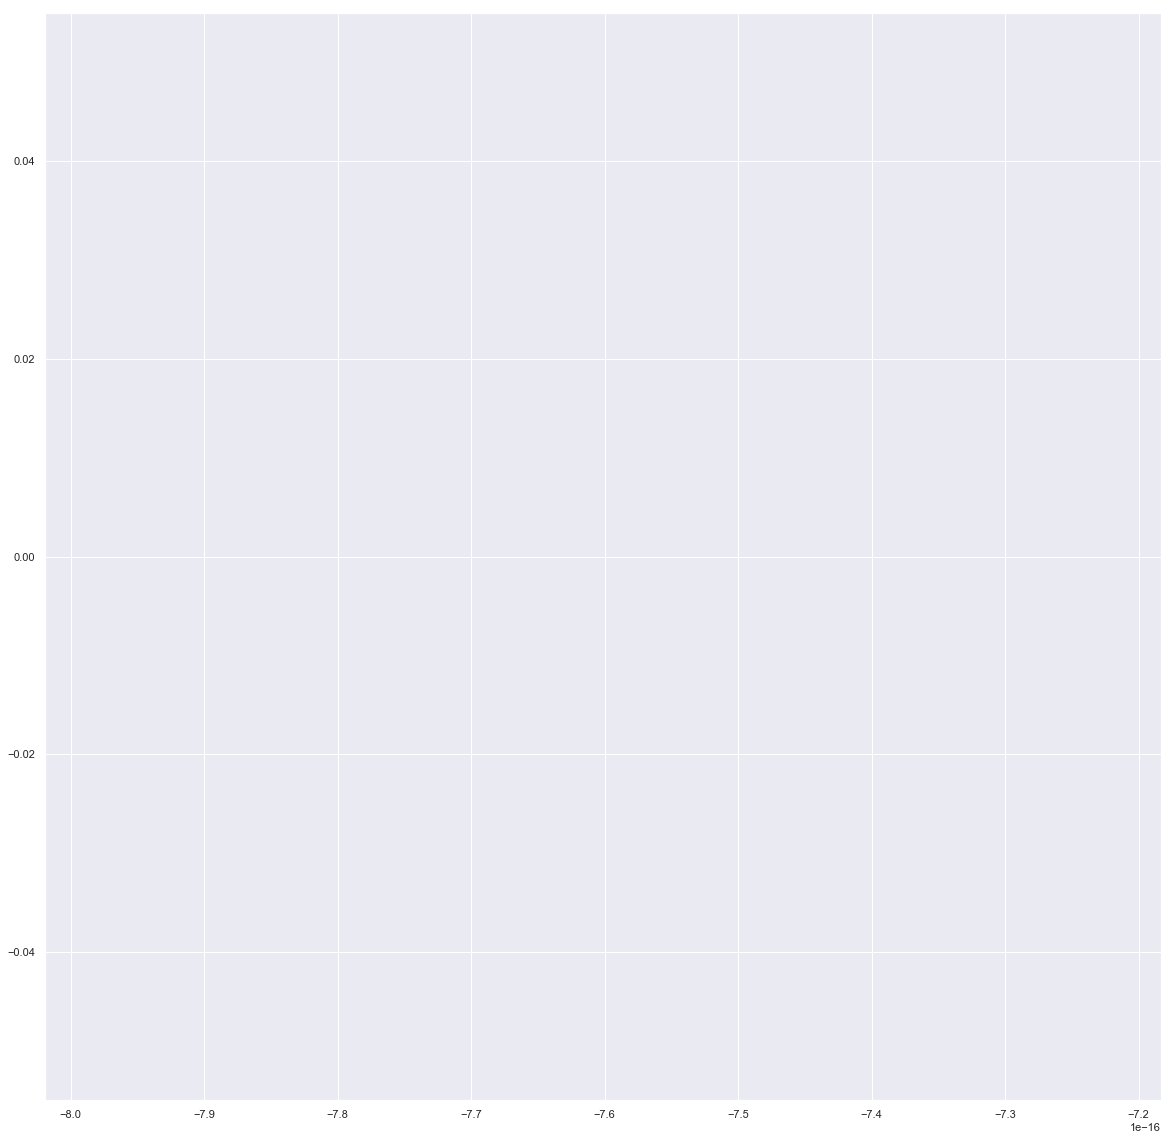

In [208]:
fig, ax = plt.subplots(figsize=(20, 20))
train_s.distplot(ax=ax)

In [ ]:
train_merged.head()

#### Scale the Data

In [154]:
from sklearn.preprocessing import StandardScaler

In [155]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_merged)

### Function to Convert nd.array to df

In [151]:
def convertToDf(ndarray, df):
    return pd.DataFrame(data=ndarray, index=df.index, columns=df.columns) 

In [157]:
train_m = convertToDf(train_scaled, train_merged)

In [158]:
train_m.head()

,LotFrontage,Street,Alley,LandContour,LandSlope,Condition1,Condition2,MSSubClass,Utilities,Neighborhood,BldgType,OverallQual,OverallCond,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,PoolArea,YrSold,Age,Total_BsmtFinSF,Total_Bathrooms,Has_Pool,Close_to_RailRoad,GarageCars,LotArea
0,0.216075,-0.064249,-0.207057,-0.204343,0.225291,-0.180398,-0.041423,-0.765776,0.018512,-0.098414,0.451344,0.646183,-0.507284,0.896833,-0.934165,-0.443078,-0.773861,0.413547,-0.06315,0.157646,-1.037881,0.450954,1.584766,-0.066884,-0.185399,0.307040,-0.217879
1,0.664158,-0.064249,-0.207057,-0.204343,0.225291,-0.180398,-0.041423,1.305865,0.018512,-0.098414,0.451344,-0.063185,2.188279,-0.395604,-0.629284,0.477463,0.261075,-0.471891,-0.06315,-0.602962,-0.180672,1.021031,0.348216,-0.066884,-0.185399,0.307040,-0.072044
2,0.305692,-0.064249,-0.207057,-0.204343,0.225291,-0.180398,-0.041423,-0.765776,0.018512,-0.098414,0.451344,0.646183,-0.507284,0.848965,-0.287999,-0.297968,-0.610718,0.563755,-0.06315,0.157646,-0.971942,-0.010138,1.584766,-0.066884,-0.185399,0.307040,0.137197
3,0.066714,-0.064249,-0.207057,-0.204343,0.225291,-0.180398,-0.041423,-0.765776,0.018512,-0.098414,0.451344,0.646183,-0.507284,-0.682812,-0.046824,-0.669812,-0.506205,0.427382,-0.06315,-1.363569,1.797503,-0.576024,-0.270058,-0.066884,-0.185399,1.619264,-0.078385
4,0.783647,-0.064249,-0.207057,-0.204343,0.225291,-0.180398,-0.041423,-0.765776,0.018512,-0.098414,0.451344,1.355551,-0.507284,0.753229,-0.160586,0.212184,-0.037170,1.378042,-0.06315,0.157646,-0.938972,0.344064,1.584766,-0.066884,-0.185399,1.619264,0.518903


In [159]:
train_merged = train_m

#### Filter out" best features

In [ ]:
# best_features = ['MSZoning', 'LotFrontage', 'LotArea', 'LandSlope', 'Condition1',
#        'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
#        'RoofStyle', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'BsmtQual',
#        'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
#        'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
#        'FullBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
#        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
#        'GarageArea', 'PavedDrive', 'OpenPorchSF', 'EnclosedPorch',
#        'ScreenPorch', 'PoolArea', 'MoSold', 'YrSold', 'SaleCondition',
#        'FloorAreaRatio', 'TotalLivingArea', 'FullBathrooms', 'HalfBathrooms',
#        'TotalBathrooms', 'TotalPorchArea', 'Aged']

In [ ]:
# train_merged = train_merged[best_features]

In [ ]:
# train_merged.shape

### Modelling

#### Split the data into training and testing data for the models

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X = train_merged.iloc[:len(y), :]
test_transformed = train_merged.iloc[len(y):, :]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [162]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [163]:
# Function to predict and output the score
def predict(model, X_test):
    y_preds = model.predict(X_test)
    print(mean_squared_error(y_test, y_preds, squared=False))

#### Linear Regression

In [166]:
linear_params = {'fit_intercept': True, 'normalize': True}
linear = LinearRegression(**linear_params)
linear.fit(X_train, y_train)

predict(linear, X_test)

47216.66168318119


#### Ridge

In [178]:
# ridge_params = {"random_state": 0, 'alpha': 10, 'max_iter': 100, 'solver': 'svd'}
ridge = Ridge(**ridge_params)
ridge.fit(X_train, y_train)

predict(ridge, X_test)

47216.66388692682


#### Lasso

In [190]:
# lasso_params = {"random_state": 0, 'alpha': 100, 'max_iter': 1000}
lasso = Lasso(**lasso_params)
lasso.fit(X_train, y_train)

predict(lasso, X_test)

47217.714076088356


#### DecisionTree

In [191]:
# tree_params = {"random_state": 0, 
#                'max_depth': 10,
#              'max_features': 'auto',
#              'min_samples_leaf': 2,
#              'min_samples_split': 5,
#              'splitter': 'random'}
tree = DecisionTreeRegressor(**tree_params)
tree.fit(X_train, y_train)

predict(tree, X_test)

38735.310113615145


#### Random Forest

In [195]:
# forest_params = {"random_state": 0, 'max_depth': None,
#  'max_features': 'sqrt',
#  'min_samples_leaf'  : 1,
#  'min_samples_split': 4,
#  'n_estimators': 100}
forest = RandomForestRegressor(**forest_params)
forest.fit(X_train, y_train)

predict(forest, X_test)

31869.63407618947


#### Gradient Boosting

In [196]:
# gboost_params = {"random_state": 0, 'learning_rate': 0.1,
#  'loss': 'lad',
#  'max_depth': 5,
#  'max_features': 'auto',
#  'min_samples_split': 2,
#  'n_estimators': 200}
gboost = GradientBoostingRegressor(**gboost_params)
gboost.fit(X_train, y_train)

predict(gboost, X_test)

29371.72352055675


### Hyperparameter Tuning

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:
def modelTuning(model, params, X_train, y_train):
    grid_search = GridSearchCV(estimator=model,
                                param_grid=params,
                                scoring="neg_root_mean_squared_error",
                                cv=5,
                                n_jobs=6,
                                verbose=1)
    
    grid_search.fit(X_train, y_train)
    best_params = {}
    
    for k,v in grid_search.best_params_.items():
        best_params[k] = v
        
    print(best_params)
    
    return best_params

#### Linear Regression Tuning

In [174]:
linear_param_grid = {"fit_intercept":[True, False],
                    "normalize": [True, False]}

linear_params = modelTuning(linear, linear_param_grid, X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.


{'fit_intercept': True, 'normalize': False}


[Parallel(n_jobs=6)]: Done  20 out of  20 | elapsed:    4.6s finished


#### Ridge Tuning

In [176]:
ridge_grid_params = {"alpha": [0.00001,0.0001,0.001, 0.01, 0.1, 0, 1, 10, 100, 200, 300],
                     "max_iter": [100, 500, 1000, 1500, 2000],
                     "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"]}

ridge_params = modelTuning(ridge, ridge_grid_params, X_train, y_train)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 104 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:   15.9s


{'alpha': 1e-05, 'max_iter': 100, 'solver': 'auto'}


[Parallel(n_jobs=6)]: Done 1914 out of 1925 | elapsed:   19.4s remaining:    0.0s
[Parallel(n_jobs=6)]: Done 1925 out of 1925 | elapsed:   19.5s finished


#### Lasso Tuning

In [188]:
lasso_grid_params = {"alpha": [0.1, 0, 1, 10, 100, 200, 300],
                     "max_iter": [100, 500, 1000, 1500, 2000, 3000, 7000]}

lasso_params = modelTuning(lasso, lasso_grid_params, X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  64 tasks      | elapsed:    1.1s


{'alpha': 0.1, 'max_iter': 3000}


[Parallel(n_jobs=6)]: Done 245 out of 245 | elapsed:    2.9s finished


#### Decision Tree Tuning

In [189]:
tree_param_grid = {"splitter": ["best", "random"],
                   "max_depth":[None, 10, 50, 100, 150],
                   "min_samples_split": [2,3,4,5],
                   "min_samples_leaf": [1,2,3],
                   "max_features": ["auto", "sqrt", "log2", None]}

tree_params = modelTuning(tree, tree_param_grid, X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    5.0s


{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}


[Parallel(n_jobs=6)]: Done 2400 out of 2400 | elapsed:    9.4s finished


#### Random Forest Tuning

In [192]:
forest_grid_params = {"n_estimators": [100, 200],
                      "max_depth":[None, 10, 50],
                      "min_samples_split": [2,4],
                      "min_samples_leaf": [1,2],
                      "max_features": ["auto", "sqrt", "log2", None]}

forest_params = modelTuning(forest, forest_grid_params, X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   20.2s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 480 out of 480 | elapsed:  2.8min finished


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### Gradient Boosting Tuning

In [ ]:
# gboost_params = {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 200}

In [193]:
gboost_grid_params = {"loss": ["ls", "lad", "huber", "quantile"],
                      "learning_rate": [0.001, 0.01, 0.1],
                      "n_estimators": [100, 200],
                      "min_samples_split": [2,4],
                      "max_features": ["auto", "sqrt", "log2", None],
                      "max_depth": [3,4,5]}

gboost_params = modelTuning(gboost, gboost_grid_params, X_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.4s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   34.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 1238 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 1788 tasks      | elapsed:  9.3min
[Parallel(n_jobs=6)]: Done 2438 tasks      | elapsed: 12.3min
[Parallel(n_jobs=6)]: Done 2880 out of 2880 | elapsed: 14.7min finished


{'learning_rate': 0.1, 'loss': 'huber', 'max_depth': 5, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 100}


### Feature Selection

In [ ]:
# from sklearn.feature_selection import RFECV, SelectKBest, f_regression

In [ ]:
# def selectFeatures(model, X_train, y_train):
#     rfecv = RFECV(estimator=model, cv=5, scoring="neg_root_mean_squared_error", verbose=1, n_jobs=6)
#     rfecv.fit(X_train, y_train)
    
#     print(X_train.columns[rfecv.support_])
#     print(len(X_train.columns[rfecv.support_]))

In [ ]:
# selectFeatures(gboost, X_train, y_train)

In [ ]:
# selectkbest = SelectKBest(f_regression, k=10)
# selectkbest.fit(X_train, y_train)

# print(X_train.columns[selectkbest.get_support()])

In [ ]:
# kbest = SelectKBest(f_regression, k=10).fit(X_train, y_train)

# mask = kbest.get_support() #list of booleans for selected features
# new_feat = [] 
# for bool, feature in zip(mask, X_train.columns):
#     if bool:
#         new_feat.append(feature)
        
# print("The best features are:{}".format(new_feat))

### Submission

In [197]:
def writeToFile(model, test_data, model_name):
    preds = model.predict(test_data)
    pd.DataFrame({"Id" : testIDs["Id"].values, "SalePrice" : preds}).to_csv(model_name + '_submission.csv',index=False)

In [198]:
writeToFile(linear, test_transformed, "LinearRegression3")

In [199]:
writeToFile(ridge, test_transformed, "Ridge3")

In [200]:
writeToFile(lasso, test_transformed, "Lasso3")

In [201]:
writeToFile(tree, test_transformed, "DecisionTree3")

In [202]:
writeToFile(forest, test_transformed, "RandomForest3")

In [203]:
writeToFile(gboost, test_transformed, "GradientBoosting3")